In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Analisando receitas repetidas

In [ ]:
df = pd.read_csv('data_resampled/recipes_sampled.csv')
df

In [4]:
df.columns

Index(['RecipeId', 'Name', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount',
       'Calories (kcal)', 'FatContent (g)', 'SaturatedFatContent (g)',
       'CholesterolContent (mg)', 'SodiumContent (mg)',
       'CarbohydrateContent (g)', 'FiberContent (g)', 'SugarContent (g)',
       'ProteinContent (g)', 'RecipeServings', 'RecipeYield',
       'RecipeInstructions', 'Review', 'NumIngredients', 'CookTime_hours',
       'PrepTime_hours', 'TotalTime_hours'],
      dtype='object')

In [5]:
# Para ver se há duplicadas com base em um atributo (exemplo: 'RecipeId')
duplicadas = df[df.duplicated(subset=['RecipeId'], keep=False)]
print(duplicadas)

Empty DataFrame
Columns: [RecipeId, Name, AuthorName, CookTime, PrepTime, TotalTime, DatePublished, Description, Images, RecipeCategory, Keywords, RecipeIngredientParts, AggregatedRating, ReviewCount, Calories (kcal), FatContent (g), SaturatedFatContent (g), CholesterolContent (mg), SodiumContent (mg), CarbohydrateContent (g), FiberContent (g), SugarContent (g), ProteinContent (g), RecipeServings, RecipeYield, RecipeInstructions, Review, NumIngredients, CookTime_hours, PrepTime_hours, TotalTime_hours]
Index: []

[0 rows x 31 columns]


In [6]:
# Para ver se há duplicadas com base em um atributo (exemplo: 'RecipeId')
duplicadas = df[df.duplicated(subset=['Name'], keep=False)]
print(duplicadas)

       RecipeId                    Name       AuthorName CookTime PrepTime  \
14       504233          Macaroni Salad           Joanne    PT10M     PT5M   
27       177378             Spiced Nuts         DiWriter     PT3M     PT3M   
45         9081        Chinese Coleslaw    Nancy Mahanay    PT10M     PT5M   
125      124747      Leaf Lettuce Salad        MarieRynr        0    PT10M   
150      248176         Garlic Croutons         Juenessa    PT15M    PT10M   
...         ...                     ...              ...      ...      ...   
10660     42395       Baked Potato Soup           podapo     PT1H    PT30M   
10730    226462       Baked Potato Soup      Vicki in CT    PT25M    PT25M   
10731    265604             Spiced Nuts  Recipe Baroness    PT20M    PT10M   
10739    187612  Sweet Potato Casserole         Juenessa    PT25M    PT20M   
10751    165631      Sweet Potato Fries   Family Kitchen    PT50M    PT15M   

      TotalTime         DatePublished  \
14        PT15M  2013-

In [8]:
# Para mostrar todas as ocorrências dos nomes duplicados (não só a primeira)
duplicadas = df[df.duplicated(subset=['Name'], keep=False)]
duplicadas.sort_values('Name').head(20)

,RecipeId,Name,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,...,SugarContent (g),ProteinContent (g),RecipeServings,RecipeYield,RecipeInstructions,Review,NumIngredients,CookTime_hours,PrepTime_hours,TotalTime_hours
5468,539226,ASPARAGUS SUMMER SALAD,CLUBFOODY,PT2M,PT15M,PT17M,2019-08-20T12:19:00Z,"Fresh, colorful, healthy &amp; easy to make, t...","""https://img.sndimg.com/food/image/upload/w_55...",Low Protein,...,2.9,6.2,4.0,NaN,['In a medium pot with a s teaming basket over...,NaN,10,0.033333,0.250000,0.283333
5555,539225,ASPARAGUS SUMMER SALAD,CLUBFOODY,PT2M,PT15M,PT17M,2019-08-20T12:16:00Z,"Fresh, colorful, healthy &amp; easy to make, t...","""https://img.sndimg.com/food/image/upload/w_55...",Low Protein,...,2.9,6.2,4.0,NaN,['In a medium pot with a s teaming basket over...,NaN,10,0.033333,0.250000,0.283333
4627,11834,Apple Dumplings,Lali8752,PT45M,PT10M,PT55M,2001-09-20T10:21:00Z,Make and share this Apple Dumplings recipe fro...,"""https://img.sndimg.com/food/image/upload/w_55...",Dessert,...,31.0,0.7,NaN,NaN,['Make your pie crust as you normally do and d...,['My Grandmother has been making these since I...,6,0.750000,0.166667,0.916667
1648,507343,Apple Dumplings,Rhodes Bake-N-Serv,PT30M,PT30M,PT1H,2013-09-29T16:16:00Z,A perfect fall recipe that uses delicious fres...,"""https://img.sndimg.com/food/image/upload/w_55...",Breads,...,27.6,7.2,NaN,8,['Spray counter lightly with non-stick cooking...,"['Chewy, sweet and perfectly bite sized. These...",6,0.500000,0.500000,1.000000
3295,462107,Apricot Chicken,Cookie,PT40M,PT10M,PT50M,2011-08-10T22:44:00Z,Make and share this Apricot Chicken recipe fro...,"""https://img.sndimg.com/food/image/upload/w_55...",Chicken Thigh & Leg,...,30.4,16.7,8.0,8 Thighs,"['Preheat Oven to 400 degrees.', 'Lightly grea...",NaN,3,0.666667,0.166667,0.833333
2860,142511,Apricot Chicken,Rita1652,PT40M,PT10M,PT50M,2005-10-24T13:46:00Z,Make and share this Apricot Chicken recipe fro...,"""https://img.sndimg.com/food/image/upload/w_55...",Chicken,...,37.3,18.4,4.0,NaN,"['Melt butter in pan, add chicken, cook until ...","[""EXCELLENT! Rita, This is sooooo tasty. Loved...",9,0.666667,0.166667,0.833333
2905,243412,BBQ Chicken Pizza,Mamas Kitchen Hope,PT15M,PT10M,PT25M,2007-07-30T06:14:00Z,Fast and yummy pizza that is a real tummy plea...,['https://img.sndimg.com/food/image/upload/w_5...,Chicken,...,6.7,34.4,NaN,NaN,"['Drain pineapple and slice or cut tomatoes, D...",['I used pre-cooked roast chicken from the del...,8,0.250000,0.166667,0.416667
2765,201064,BBQ Chicken Pizza,amsedlacek,PT10M,PT15M,PT25M,2006-12-19T16:53:00Z,Make and share this BBQ Chicken Pizza recipe f...,"""https://img.sndimg.com/food/image/upload/w_55...",Chicken,...,1.5,27.3,2.0,NaN,['Pan fry chicken until it is no longer pink i...,['This was a yummy pizza. I used a premade pi...,5,0.166667,0.250000,0.416667
7636,27294,BBQ Pork Chops,Kim19068,PT1H30M,PT5M,PT1H35M,2002-05-04T14:54:00Z,Make and share this BBQ Pork Chops recipe from...,['https://img.sndimg.com/food/image/upload/w_5...,Pork,...,6.5,24.2,6.0,NaN,"['Mix first four ingredients in a bowl.', 'Pla...","['These were very good. I loved the flavor, ha...",4,1.500000,0.083333,1.583333
7814,449077,BBQ Pork Chops,katew,0,PT10M,PT10M,2011-02-19T04:41:00Z,Make and share this BBQ Pork Chops recipe from...,"""https://img.sndimg.com/food/image/upload/w_55...",Pork,...,0.1,52.1,8.0,NaN,"['Put chilli, fennel and sea salt into a morta...",['The seasoning produces an excellent flavor t...,3,0.000000,0.166667,0.166667


In [11]:
len(df[df['RecipeCategory']=='< 15 Mins'])

135

In [13]:
len(df[df['RecipeCategory']=='Bath/Beauty'])

6

#   Colocando as unidades no eixo

In [2]:
df = pd.read_csv('data_resampled/recipes_sampled.csv')

In [3]:
df.columns

Index(['RecipeId', 'Name', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount', 'Calories',
       'FatContent', 'SaturatedFatContent', 'CholesterolContent',
       'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent',
       'ProteinContent', 'RecipeServings', 'RecipeYield', 'RecipeInstructions',
       'Review', 'NumIngredients', 'CookTime_hours', 'PrepTime_hours',
       'TotalTime_hours'],
      dtype='object')

In [4]:
# Renomeia as colunas colocando a unidade entre parêntesis

df = df.rename(columns={
    'Calories': 'Calories (kcal)',
    'FatContent': 'FatContent (g)',
    'SaturatedFatContent': 'SaturatedFatContent (g)',
    'CarbohydrateContent': 'CarbohydrateContent (g)',
    'FiberContent': 'FiberContent (g)',
    'SugarContent': 'SugarContent (g)',
    'ProteinContent': 'ProteinContent (g)',
    'CholesterolContent': 'CholesterolContent (mg)',
    'SodiumContent': 'SodiumContent (mg)'
})

df.columns

Index(['RecipeId', 'Name', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount',
       'Calories (kcal)', 'FatContent (g)', 'SaturatedFatContent (g)',
       'CholesterolContent (mg)', 'SodiumContent (mg)',
       'CarbohydrateContent (g)', 'FiberContent (g)', 'SugarContent (g)',
       'ProteinContent (g)', 'RecipeServings', 'RecipeYield',
       'RecipeInstructions', 'Review', 'NumIngredients', 'CookTime_hours',
       'PrepTime_hours', 'TotalTime_hours'],
      dtype='object')

In [5]:
df.to_csv('data_resampled/recipes_sampled.csv', index=False)
df.to_csv('data/recipes_sampled.csv', index=False)


# Reduzindo dataset

In [23]:
df = pd.read_csv('data/recipes_cleaned.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327508 entries, 0 to 327507
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    327508 non-null  int64  
 1   Name                        327508 non-null  object 
 2   AuthorId                    327508 non-null  float64
 3   AuthorName                  327508 non-null  object 
 4   CookTime                    327508 non-null  object 
 5   PrepTime                    327508 non-null  object 
 6   TotalTime                   327508 non-null  object 
 7   DatePublished               327508 non-null  object 
 8   Description                 327507 non-null  object 
 9   Images                      327508 non-null  object 
 10  RecipeCategory              327472 non-null  object 
 11  Keywords                    318196 non-null  object 
 12  RecipeIngredientQuantities  327505 non-null  object 
 13  RecipeIngredie

In [34]:
df['Review'][0]

'[\'This is a very good soup.  We served ours warm with soup crackers.  Low in calories & fat. Thanks Tracy & Jeff.\', \'hi im going to make this soup tonight doing so right now will let you know im sure i will love it thank yoiu  \\r\\nsassyface\', \'nice base but needed some seasoning help.  Worked great on variations of seasoning such as Italian or Soul.\', \'Too bland\', \'i would like the 7 day recipe for the cabbage soup please send it to me\\r\\n \', \'We liked this soup. We added about three cups of water and chicken boillion cubes to stretch it farther and give it a little more flavor. \', \'VERY GOOD! in both texture and taste! awesome recipe!\', "For years, I\'ve made a soup just like this with V8 instead of tomato juice.  For variety, add small, cooked meatballs or cubed pieces of leftover meatloaf.  This is a great soup!", \'I am a big fan of cooked cabbage and anything tomato, so this recipe was just what I needed.  I did not have tomato juice, so I used puree and beef br

In [24]:
df.drop(columns=['AuthorId', 'RecipeIngredientQuantities'], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327508 entries, 0 to 327507
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               327508 non-null  int64  
 1   Name                   327508 non-null  object 
 2   AuthorName             327508 non-null  object 
 3   CookTime               327508 non-null  object 
 4   PrepTime               327508 non-null  object 
 5   TotalTime              327508 non-null  object 
 6   DatePublished          327508 non-null  object 
 7   Description            327507 non-null  object 
 8   Images                 327508 non-null  object 
 9   RecipeCategory         327472 non-null  object 
 10  Keywords               318196 non-null  object 
 11  RecipeIngredientParts  327508 non-null  object 
 12  AggregatedRating       173072 non-null  float64
 13  ReviewCount            327508 non-null  float64
 14  Calories               327508 non-nu

In [27]:
df['Images'].value_counts()

Images
character(0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [28]:
df = df[df['Images'] != 'character(0)'] 

In [31]:
df['Images'].value_counts()

Images
"https://img.sndimg.com/food/image/upload/w_555,h_416,c_fit,fl_progressive,q_95/v1/img/submissions/recipe/1802649943/NwpJL4MLRrSWd0jwtfsi_EC_Nutella%20cinnamon%20muffins.jpg"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [32]:
df.to_csv('data/recipes_test.csv', index=False)

In [35]:
# Amostra 5% de cada classe de RecipeCategory de forma aleatória

df_sampled = df.groupby('RecipeCategory', group_keys=False).apply(lambda x: x.sample(frac=0.10, random_state=42))

# Reseta o índice
df_sampled = df_sampled.reset_index(drop=True)

print(df_sampled['RecipeCategory'].value_counts(normalize=True))
print(df_sampled.shape)

RecipeCategory
Dessert          0.095696
Lunch/Snacks     0.073896
Vegetable        0.070201
One Dish Meal    0.053021
Beverages        0.052743
                   ...   
Szechuan         0.000092
Tempeh           0.000092
Swedish          0.000092
Swiss            0.000092
Turkish          0.000092
Name: proportion, Length: 218, dtype: float64
(10826, 31)


C:\Users\thais.sousa\AppData\Local\Temp\ipykernel_17592\1827782505.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby('RecipeCategory', group_keys=False).apply(lambda x: x.sample(frac=0.10, random_state=42))


In [36]:
df_sampled.to_csv('data/recipes_sampled.csv', index=False)

# Testando as visualizações agora

In [4]:
df_sampled = pd.read_csv('data_resampled/recipes_sampled.csv')

In [5]:
df_sampled['DatePublished_format'] = pd.to_datetime(df_sampled['DatePublished'])
df_sampled['DatePublished_format'].head()

0   2006-02-07 16:59:00+00:00
1   2010-04-12 09:03:00+00:00
2   2007-09-07 15:31:00+00:00
3   2006-12-04 17:59:00+00:00
4   2010-06-13 02:22:00+00:00
Name: DatePublished_format, dtype: datetime64[ns, UTC]

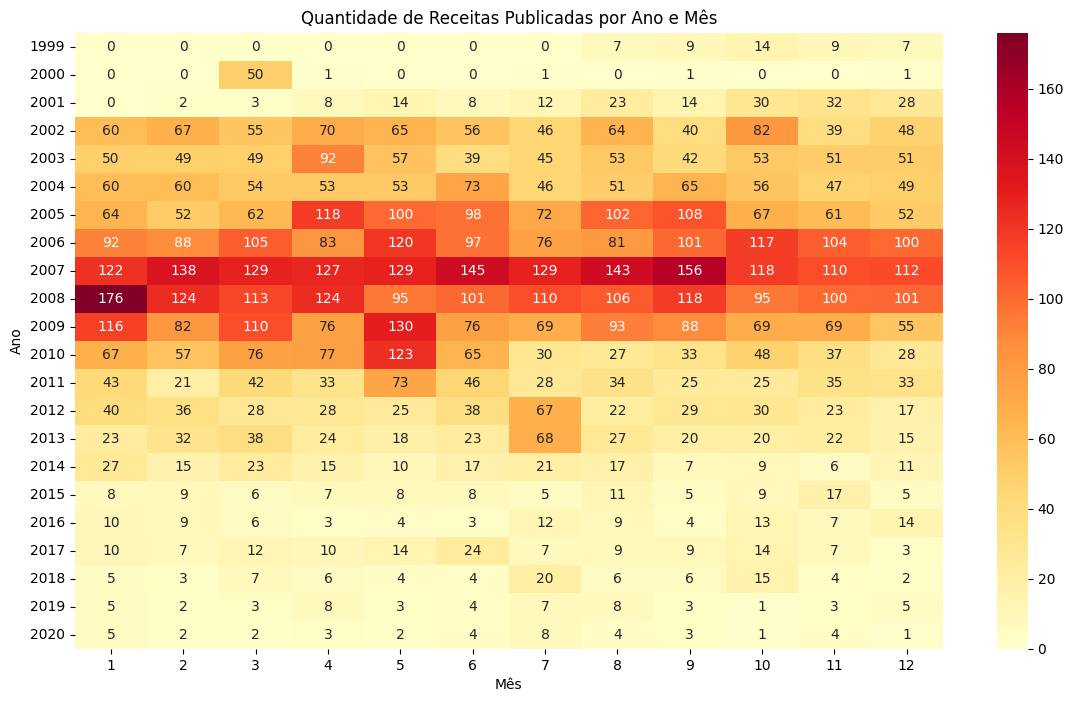

In [6]:
# Agrupa por ano e mês e conta as receitas
df_sampled['year'] = df_sampled['DatePublished_format'].dt.year
df_sampled['month'] = df_sampled['DatePublished_format'].dt.month

recipes_by_year_month = df_sampled.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(recipes_by_year_month, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Quantidade de Receitas Publicadas por Ano e Mês')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.show()

In [17]:
df_sampled.columns

Index(['RecipeId', 'Name', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientParts', 'AggregatedRating', 'ReviewCount',
       'Calories (kcal)', 'FatContent (g)', 'SaturatedFatContent (g)',
       'CholesterolContent (mg)', 'SodiumContent (mg)',
       'CarbohydrateContent (g)', 'FiberContent (g)', 'SugarContent (g)',
       'ProteinContent (g)', 'RecipeServings', 'RecipeYield',
       'RecipeInstructions', 'Review', 'NumIngredients', 'CookTime_hours',
       'PrepTime_hours', 'TotalTime_hours', 'DatePublished_format', 'year',
       'month'],
      dtype='object')

C:\Users\thais.sousa\AppData\Local\Temp\ipykernel_66744\823427244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['year'] = df_new['DatePublished_format'].dt.year


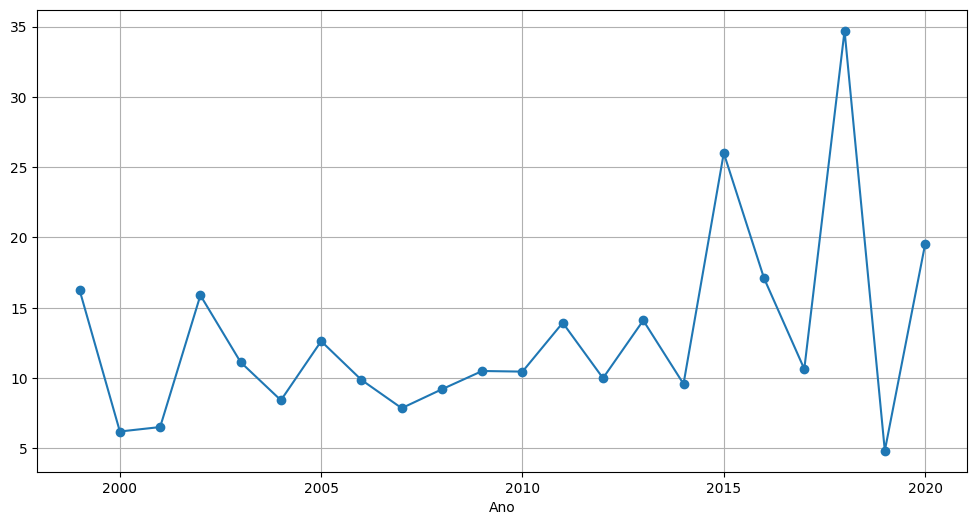

In [23]:
df_new = df_sampled[df_sampled['RecipeCategory']=='Beverages']
# Média de SaturatedFatContent por ano
df_new['year'] = df_new['DatePublished_format'].dt.year
SaturatedFatContent_per_year = df_new.groupby('year')['SugarContent (g)'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(SaturatedFatContent_per_year['year'], SaturatedFatContent_per_year['SugarContent (g)'], marker='o')
plt.xlabel('Ano')
#plt.ylabel('Mediana de gordura Saturada (g)')
#plt.title('Mediana de gordura Saturada (g) das Receitas por Ano')
#plt.ylim([0, 5])  # Ajusta o limite do eixo y para melhor visualização
plt.grid(True)
plt.show()

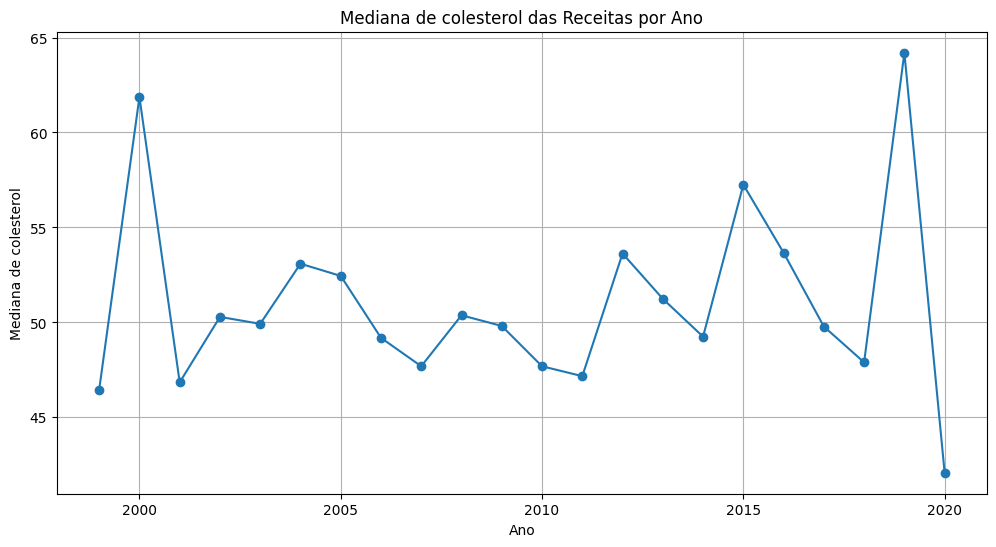

In [44]:
# Média de CholesterolContent por ano
df_sampled['year'] = df_sampled['DatePublished_format'].dt.year
CholesterolContent_per_year = df_sampled.groupby('year')['CholesterolContent'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(CholesterolContent_per_year['year'], CholesterolContent_per_year['CholesterolContent'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Mediana de colesterol')
plt.title('Mediana de colesterol das Receitas por Ano')
plt.grid(True)
plt.show()

In [45]:
df_sampled['PrepTime_hours']

0        0.166667
1        0.166667
2        0.000000
3        0.166667
4        0.083333
           ...   
26186    0.250000
26187    0.166667
26188    0.333333
26189    0.500000
26190    0.333333
Name: PrepTime_hours, Length: 26191, dtype: float64

In [46]:
df_sampled['TotalTime_hours'].describe()

count    26191.000000
mean         0.601364
std          0.386742
min          0.000000
25%          0.333333
50%          0.500000
75%          0.833333
max          2.166667
Name: TotalTime_hours, dtype: float64

In [47]:
# Filtra as linhas onde 'TotalTime_hours' é maior que 2
df_sampled[df_sampled['TotalTime_hours']>100]

,RecipeId,Name,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,...,RecipeYield,RecipeInstructions,Review,NumIngredients,CookTime_hours,PrepTime_hours,TotalTime_hours,DatePublished_format,year,month


In [28]:
df_temp = df_sampled[df_sampled['TotalTime_hours']<100].copy()

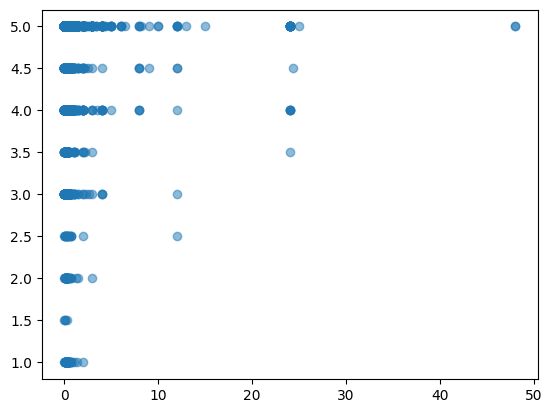

In [48]:
plt.scatter(df_temp['PrepTime_hours'], df_temp['AggregatedRating'], alpha=0.5)

In [61]:
df_desserts = df_sampled[df_sampled['RecipeCategory'] == 'Dessert'].copy()

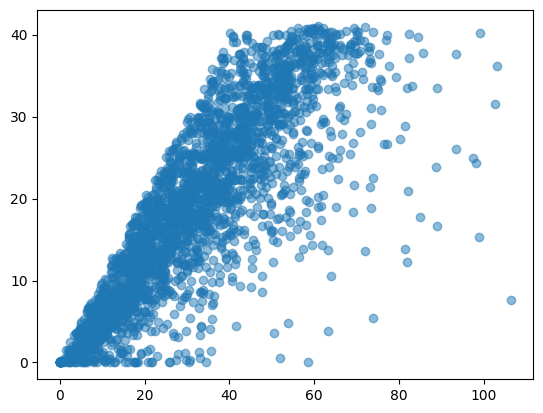

In [64]:
plt.scatter(df_desserts['CarbohydrateContent'], df_desserts['SugarContent'],alpha=0.5)

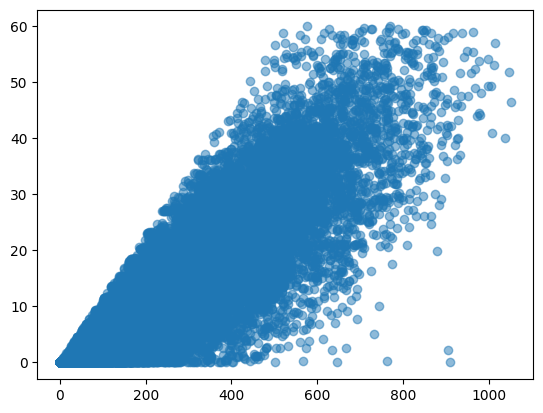

In [56]:
plt.scatter(df_sampled['Calories'], df_sampled['FatContent'],alpha=0.5)

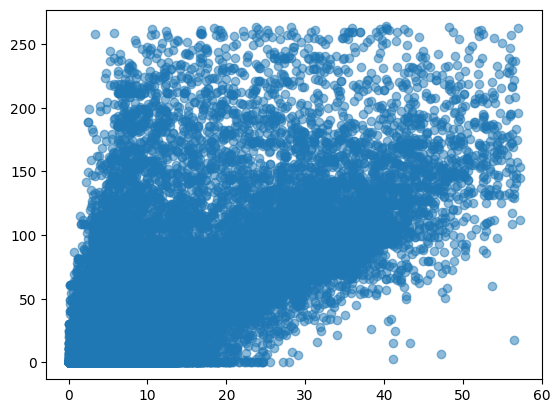

In [55]:
plt.scatter(df_sampled['ProteinContent'], df_sampled['CholesterolContent'], alpha=0.5)

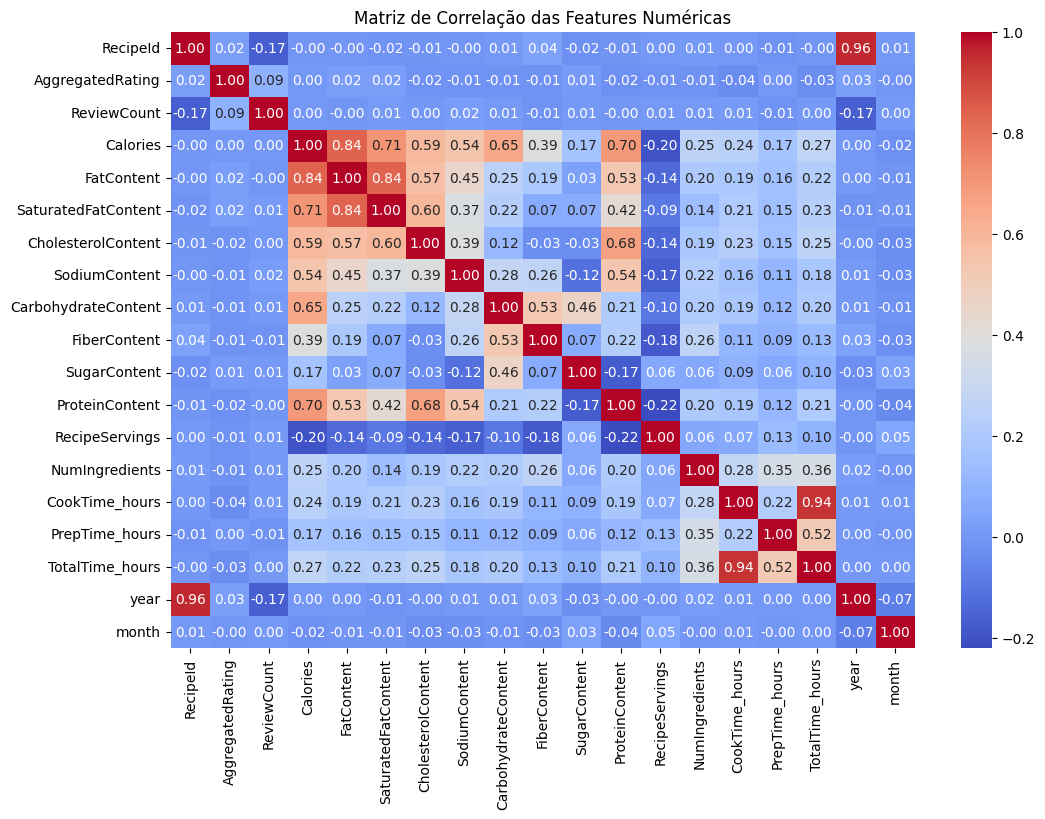

In [53]:
# Seleciona apenas as colunas numéricas
numeric_df = df_sampled.select_dtypes(include=['number'])

# Calcula a matriz de correlação
corr = numeric_df.corr()

# Plota o heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Features Numéricas')
plt.show()

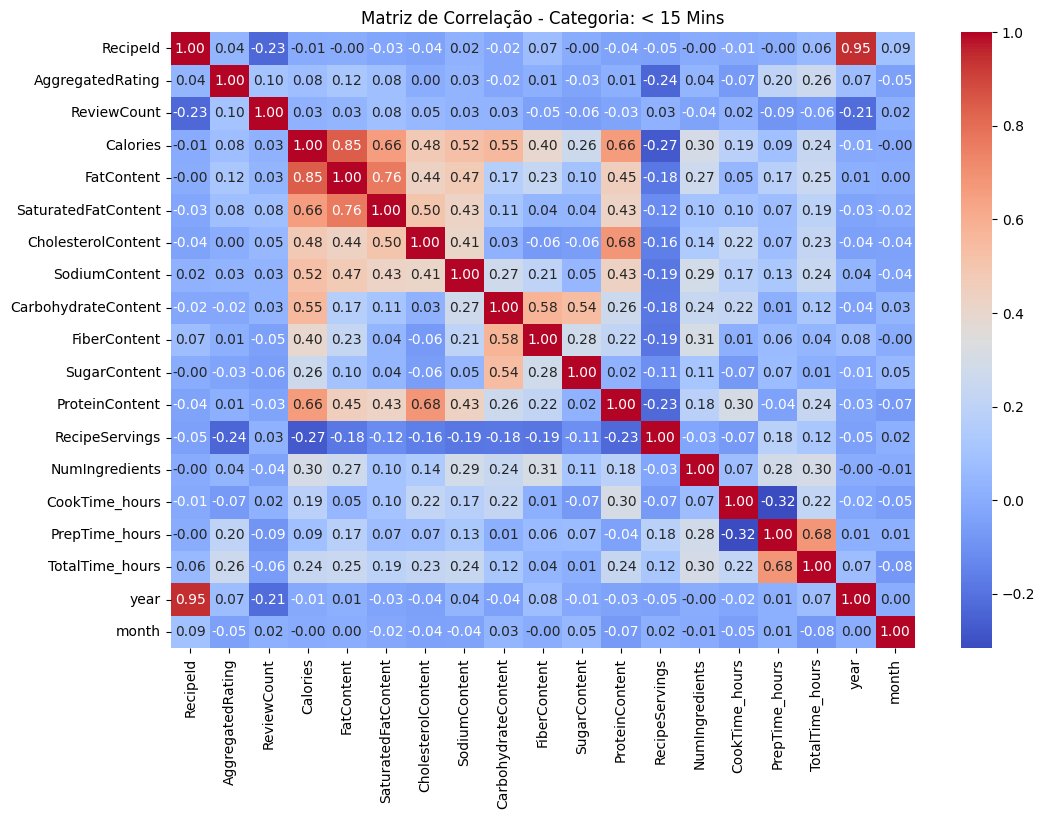

In [57]:
def plot_category_correlation_heatmap(df,category):
    """
    Plota o heatmap da matriz de correlação das features numéricas para uma categoria de receita específica.
    Parâmetros:
        category (str): Nome da categoria (ex: 'Dessert', 'Vegetable')
    """
    df_cat = df[df['RecipeCategory'] == category]
    numeric_df = df_cat.select_dtypes(include=['number'])
    corr = numeric_df.corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f'Matriz de Correlação - Categoria: {category}')
    plt.show()

# Exemplo de uso:
plot_category_correlation_heatmap(df_sampled,'< 15 Mins')

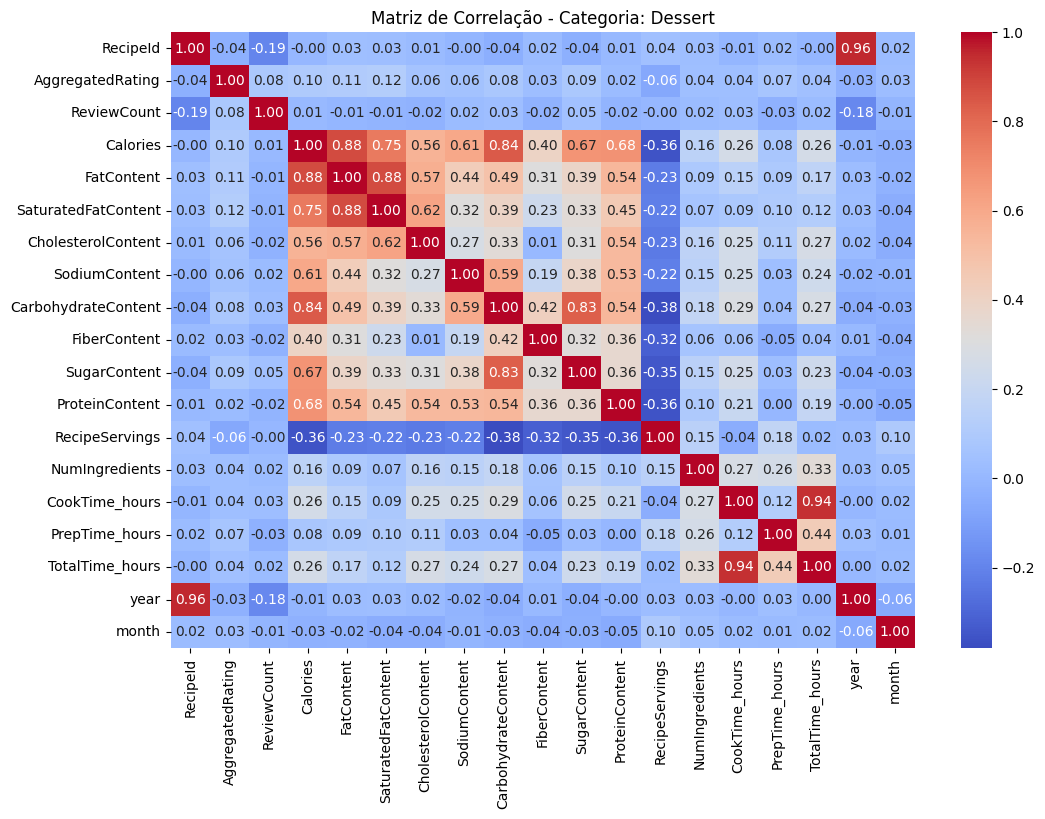

In [58]:
plot_category_correlation_heatmap(df_sampled,'Dessert')

In [75]:
series = df_sampled['RecipeCategory'].value_counts()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b885ea0cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b885ea0910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b885ea0e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b86211bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b86211bc50>],
 'means': []}

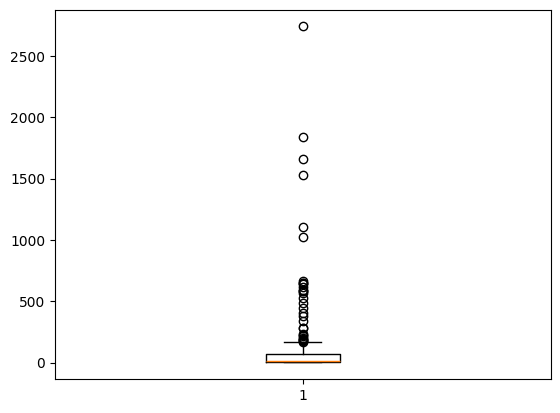

In [79]:
plt.boxplot(series)

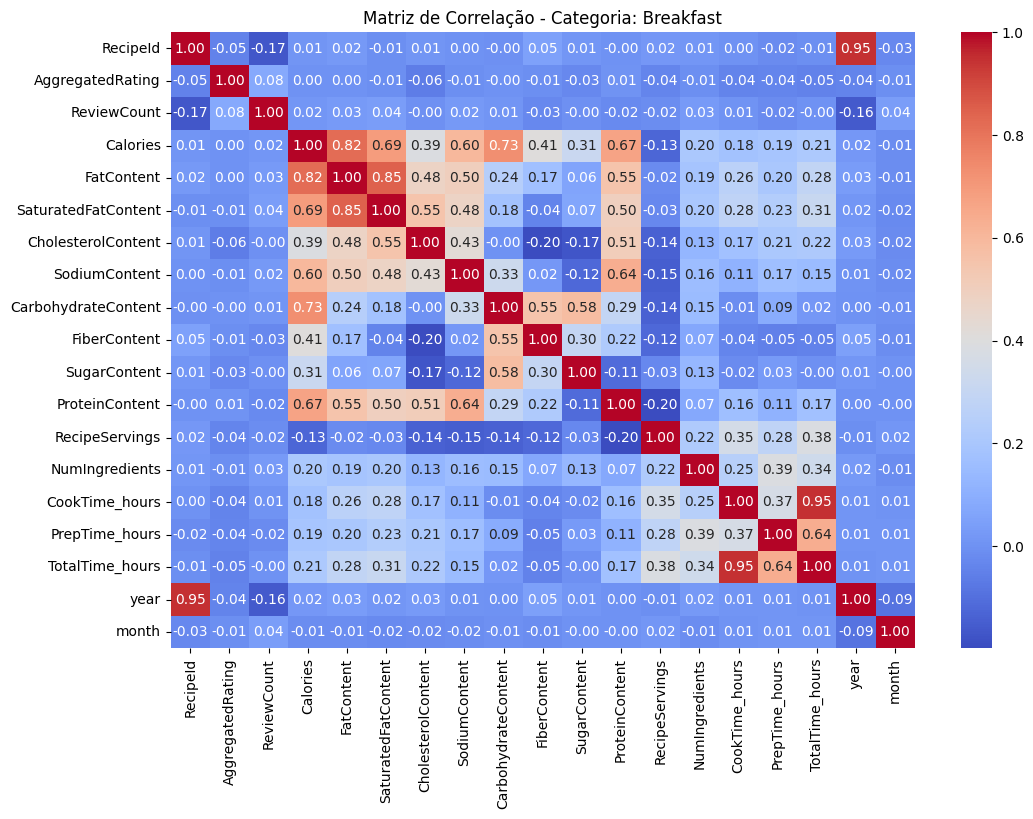

In [68]:
plot_category_correlation_heatmap(df_sampled,'Breakfast')

In [4]:
df_sampled = pd.read_csv('data/recipes_sampled.csv')

In [6]:
df_temp = df_sampled.groupby('RecipeCategory').count().reset_index()

In [9]:
df_temp[['RecipeId','RecipeCategory']].sort_values(by='RecipeId', ascending=False)

,RecipeId,RecipeCategory
65,2741,Dessert
119,1843,Lunch/Snacks
231,1658,Vegetable
144,1526,One Dish Meal
24,1105,Breakfast
...,...,...
150,1,Palestinian
159,1,Peruvian
206,1,St. Patrick's Day
210,1,Stove Top


In [12]:
df_sampled[df_sampled['RecipeCategory'] == 'Brazilian']

,RecipeId,Name,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,...,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Review,NumIngredients,CookTime_hours,PrepTime_hours,TotalTime_hours
3691,304357,Cream of Hearts of Palm Soup,WiGal,PT10M,PT5M,PT15M,2008-05-20T18:01:00Z,Make and share this Cream of Hearts of Palm So...,"""https://img.sndimg.com/food/image/upload/w_55...",Brazilian,...,2.0,9.7,4.0,NaN,['Drain and rinse the palm hearts then place i...,"['Very Nice! I used veggie broth, 1% milk and ...",6,0.166667,0.083333,0.25
3692,355085,Brazilian Risoles,Demotherway,PT15M,PT15M,PT30M,2009-02-10T01:24:00Z,Make and share this Brazilian Risoles recipe f...,['https://img.sndimg.com/food/image/upload/w_5...,Brazilian,...,0.9,4.2,17.0,NaN,"['mix milk, Parmesan cheese and chicken bouill...",NaN,4,0.250000,0.250000,0.50


In [14]:
df_temp['RecipeId'].describe()

count     244.000000
mean      107.340164
std       294.073398
min         1.000000
25%         3.000000
50%        14.000000
75%        68.250000
max      2741.000000
Name: RecipeId, dtype: float64

In [17]:
df_temp[df_temp['RecipeId'] < 20]

,RecipeCategory,RecipeId,Name,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,Review,NumIngredients,CookTime_hours,PrepTime_hours,TotalTime_hours
4,African,12,12,12,12,12,12,12,12,12,...,12,12,10,3,12,8,12,12,12,12
6,Artichoke,2,2,2,2,2,2,2,2,2,...,2,2,1,0,2,2,2,2,2,2
9,Austrian,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
10,Avocado,6,6,6,6,6,6,6,6,6,...,6,6,4,4,6,3,6,6,6,6
11,Baking,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Welsh,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,0,1,1,1,1
237,Whitefish,5,5,5,5,5,5,5,5,5,...,5,5,4,1,5,5,5,5,5,5
239,Whole Turkey,2,2,2,2,2,2,2,2,2,...,2,2,2,1,2,1,2,2,2,2
240,Wild Game,7,7,7,7,7,7,7,7,7,...,7,7,3,2,7,2,7,7,7,7
